# Main Quest 02_Bonus Quest 타이타닉 EDA 필사

- 데이터 : [캐글 타이타닉 데이터](https://www.kaggle.com/code/ash316/eda-to-prediction-dietanic)
  `EDA To Prediction(DieTanic)` - ASHWINI SWAIN
    - 해당 노트북의 EDA 파트를 필사


## 문제
- Q1. 컬럼 정의 - 각 컬럼과 그 자료형을 설명해주세요
- Q2. 결측치와 이상치 제거 - 필요하지 않은 데이터, 결측치, 이상치를 찾고 제거해주세요
- Q3. 개별 특성 파악 - 다양한 방식의 그래프로, 개별 특성을 파악하고 시각화해주세요
- Q4. 특성간 상관관계 분석 (2점) - 다양한 방식의 그래프로, 연관 특성을 찾아주세요   
- 시각화 자료와 마크다운으로 작업 방향의 근거와 데이터 해석 의견을 기술해주세요

## 문제 풀이

In [100]:
# load data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

data = pd.read_csv('../MainQuest02/train.csv')

---
### Q1. 컬럼 정의
- 각 컬럼과 그 자료형을 설명

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [102]:
display(data.head())
print(data.shape)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


(891, 12)


- 총 데이터 수 : 891개, 피처 수 : 12개
    - 범주형 데이터 : 5개, 수치형 데이터 : 7개

In [103]:
# 각 데이터 정보가 사람수를 나타내는건지 확인 
len(set(data['PassengerId']))

891

- 데이터는 모두 고유값(중복값이 없다)
    - 각 데이터는 타이타닉 호에 탑승한 사람들의 데이터를 의미함
    - 총 891명 탑승
 
`Data Dictionary` (캐글 정보 참고)
- survived : 생존 여부
    - 1 = 생존
    - 0 = 죽음
- pclass : 승객 등급
    - 1 = 1등급
    - 2 = 2등급
    - 3 = 3등급
- sex : 성별
- Age : 나이
    - 추정값이라 정확하지 않은경우 xx.5로 표기
- sibsp : 타이타닉에 함께 탑승한 형제/자매 또는 배우자 수
- parch : 타이타닉에 함께 탑승한 부모 또는 자녀 수
- ticket : 티켓 번호
- fare : 운임비
- cabin : 캐빈 번호
- embarked : 승선장소
    - C = Cherbourg
    - Q = Queenstown
    - S = Southhampton


### Q2. 결측치와 이상치 제거 
- 필요하지 않은 데이터, 결측치, 이상치를 찾고 제거

In [104]:
# 결측치 개수 파악
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- Age, Cabin에 결측치가 많고, embarked에 조금 있다
    - Age는 이름에 있는 Mr, Mrs, Miss를 기준으로 평균 값으로 채운다.
- 캐빈 번호는 임의 값으로 채우기 어려운 데이터이고, embarked는 2개밖에 되지 않음
    - Cabin : 컬럼 전체 삭제
    - embarked는 결측값이 있는 데이터 행 삭제

#### 1) 이름 결측값 채우기

In [105]:
# Age의 결측값 있는 데이터 확인
data[data['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [106]:
import re
data['Initial']=0
# 정규 표현식을 사용해서 이름 앞 부분 추출
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.')

In [107]:
# 성별기준으로 이름 앞부분 데이터 개수확인
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r') 

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


- 그런데 보니 이상한 값들이 있다.
    - 이상한 값 바꿔준다

In [108]:
data['Initial'].replace([
    'Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [109]:
# 이니셜기준으로 나이대 평균값 구하기
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [110]:
# 위 값을 기준으로 결측값 채우기
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [111]:
# 나이대 데이터 결측값 확인
data.Age.isnull().any()

False

#### 2) embarked 결측치 삭제

In [112]:
# embarked 결측값 있는 데이터 행 전체 삭제
data.Embarked.dropna(axis=0)
data[data['Embarked'].isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs


#### 3) cabin 컬럼 삭제

In [126]:
# cabin 컬럼 전체 삭제
data['Cabin'].dropna(axis=1)
data.head()

ValueError: No axis named 1 for object type Series

> 왜 삭제가 안되는거지...?

### Q3. 개별 특성 파악 
- 다양한 방식의 그래프로, 개별 특성을 파악하고 시각화

In [113]:
# 나이대 확인
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')


Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.841941638608304 Years


- 가장 나이가 많은 탑승객은 80세, 가장 어린 탑승객은 1세가 되지 않는다.
- 평균 나이대는 30대정도이다

#### 1) 생존 비율

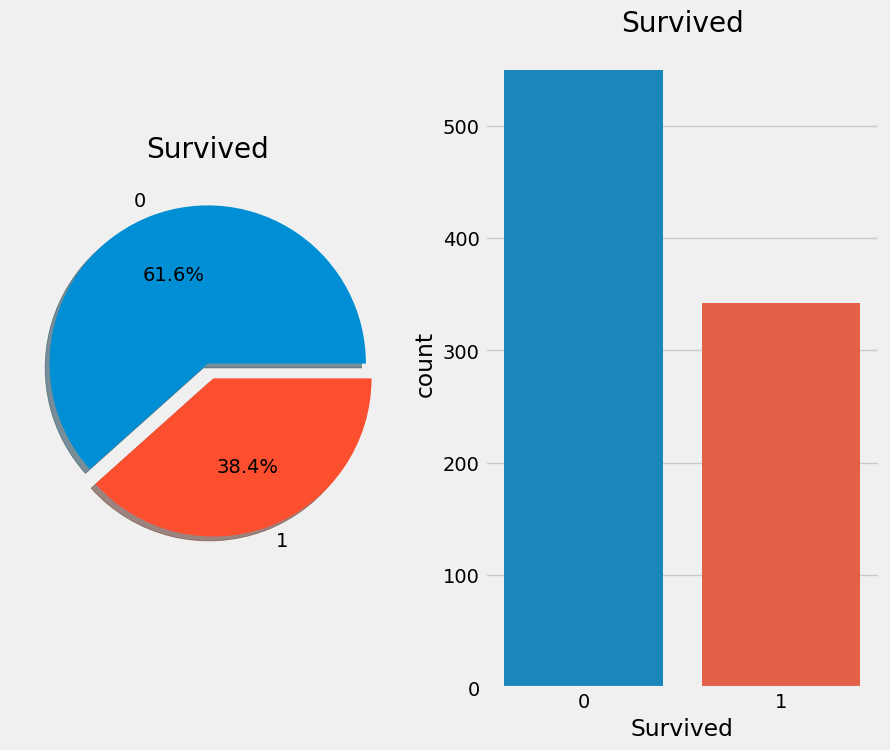

In [114]:
# 그래프 공간 만들기 : 같은 라인에 2개 그래프 표시 
f,ax = plt.subplots(1,2,figsize=(10,8))

# 파이그래프 - 비율 표시
'''
explode : 파이조각 돌출 되는 크기
- 2번째 파이조각만 0.1 만큼 돌출시킴
autopct : 파이조각의 백분율을 소수점 1자리까지 표시
shadow : 그림자표시 적용
'''
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
# 그래프 이름 설정 - 0번 자리에 그림(왼쪽)
ax[0].set_title('Survived')
# ylabel 표시 제외
ax[0].set_ylabel('')

# 막대 그래프
sns.countplot(x = data['Survived'], data=data, ax=ax[1])
# 그래프 이름 설정
ax[1].set_title('Survived')

plt.show()

- 생존자는 탑승객의 약 38% 정도밖에 되지 않는다

#### 2) 성별에 따른 생존 여부

In [115]:
# 성별 값과 생존 값을 비교
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

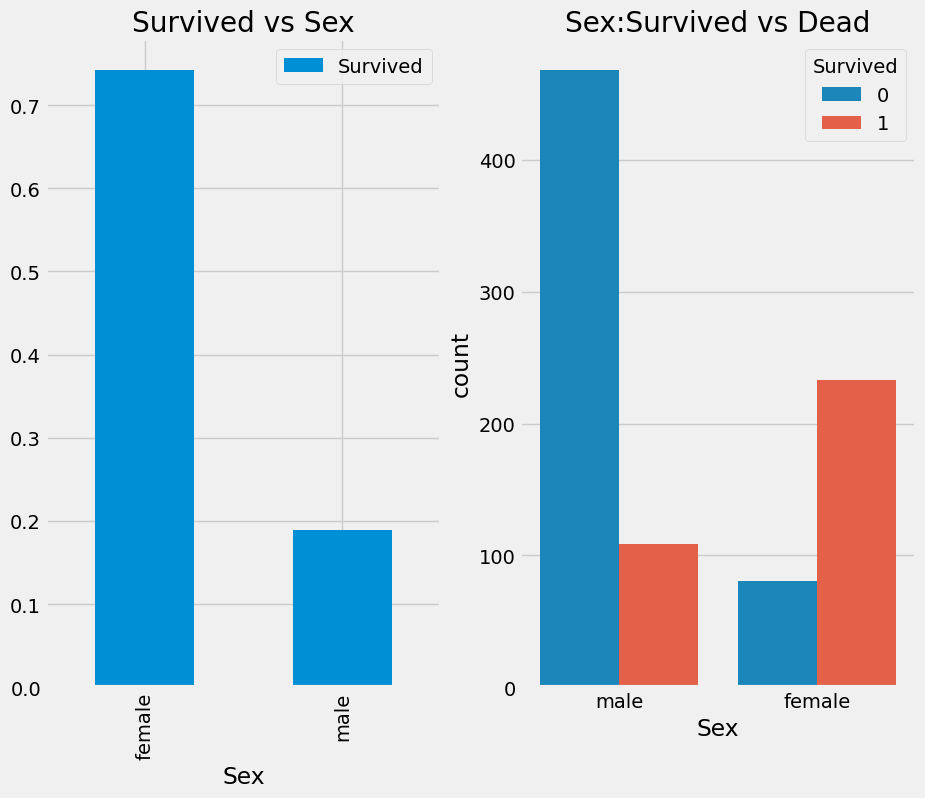

In [116]:
# 그래프 공간 만들기 : 같은 라인에 2개 그래프 표시 
f,ax=plt.subplots(1,2,figsize=(10,8))

# 성별간 생존 비율 비교 - 평균값으로 그래프화
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

# 성별간 생존여부 비교 - Survived를 기준으로 데이터 쪼갬
sns.countplot(x=data['Sex'], hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

남성이 여성보다 훨씬 더 많이 탑승했음에도
- 좌측 성별간 생존비율 그래프를 보면 생존비율은 여성이 75%, 남성은 19% 정도이다.
- 우측 성별간 생존 여부를 보면 남성의 사망 카운트 수가 상당히 높다.

#### 3) 탑승 클래스에 따른 생존 여부 확인

In [117]:
# 탑승 클래스별 생존 여부 표 
'''
margins=True : 행과 열의 합계를 All로 표시
background_gradient(cmap='summer_r') : 값을 그라데이션으로 표현
'''
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


- 탑승자 수는 3등급 > 1등급 > 2등급
- 생존자 수는 1등급 > 3등급 > 2등급
- 각 클래스별 탑승자의 수가 다르기 때문에 비율을 확인하기 위해 아래 그래프로 확인

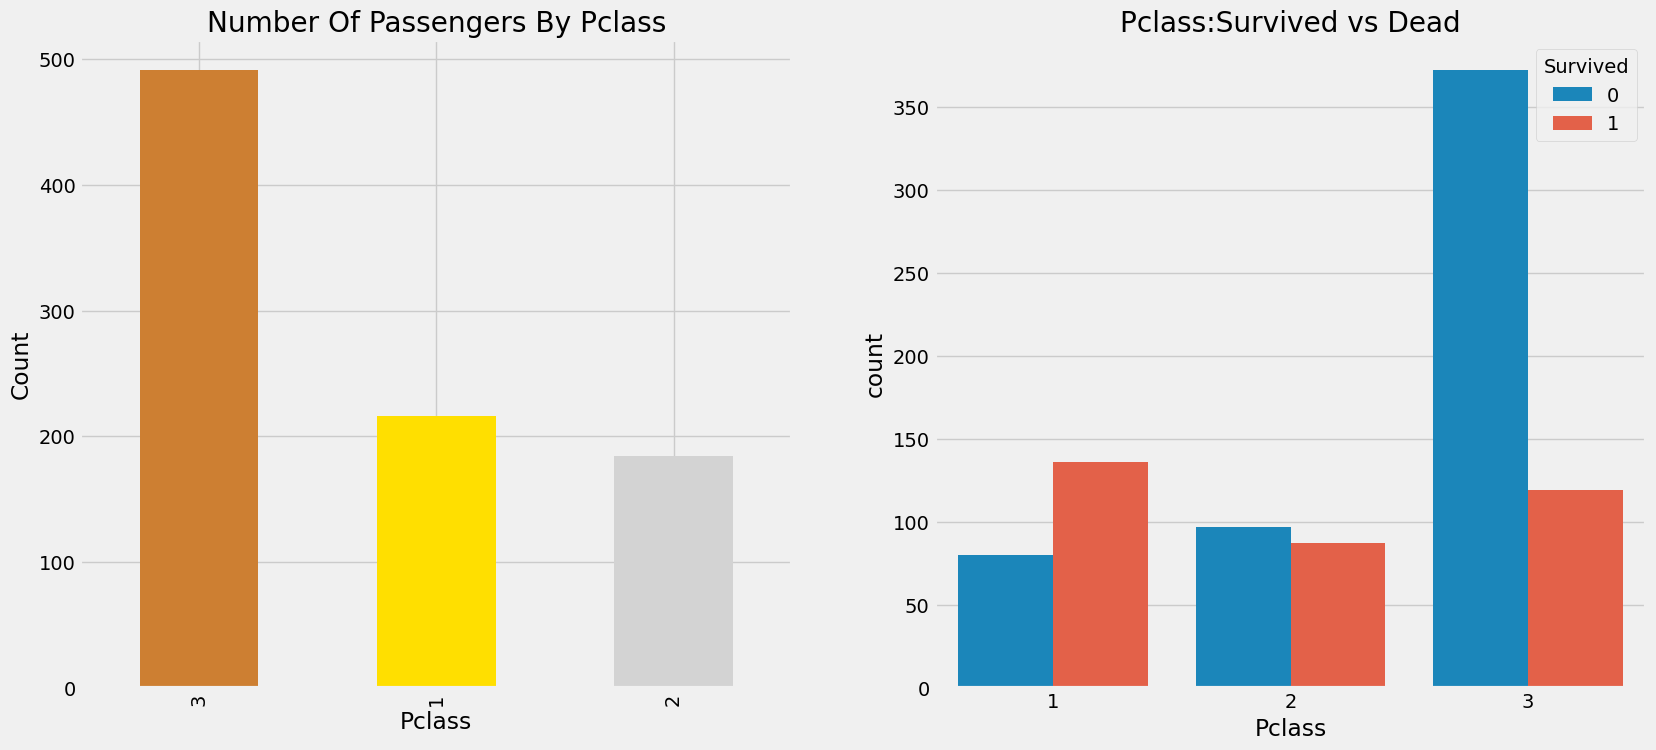

In [118]:
# 막대 그래프
f,ax=plt.subplots(1,2,figsize=(18,8))

# 클래스별 탑승자 수 그래프
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')

# 클래스별 생존여부 비교
sns.countplot(x=data['Pclass'],hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

- 왼쪽 그래프를 보면 탑승객 중에 3등급 수가 월등이 높다
- 하지만 오른쪽 클래스별 탑승객의 생존여부 그래프를 보면
    - 1, 2등급에 비해 3등급 탑승객은 2/3 이상이 사망했다
 
=> 만약에 성별과 클래스를 비교해보면 어떤 결과가 나올까?  

### Q4. 특성간 상관관계 분석
- 다양한 방식의 그래프로, 연관 특성을 찾아주세요
- 시각화 자료와 마크다운으로 작업 방향의 근거와 데이터 해석 의견을 기술해주세요

#### 1) 성별, 클래스에 따른 생존 여부

In [119]:
# 성별과 클래스간 생존자 수 비교
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

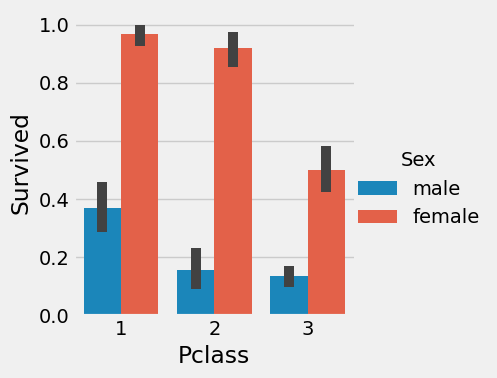

In [120]:
# 성별을 기준으로 클래스별 생존 비율
sns.catplot(x='Pclass', y='Survived',hue='Sex',data=data, kind="bar", height=4, aspect=1)

- 클래스가 높은 여성일수록 생존가능성이 상당히 높다 - 거의 90% 넘는 비율로 생존했다..!

#### 2) 나이, 성별, 클래스에 따른 생존 여부

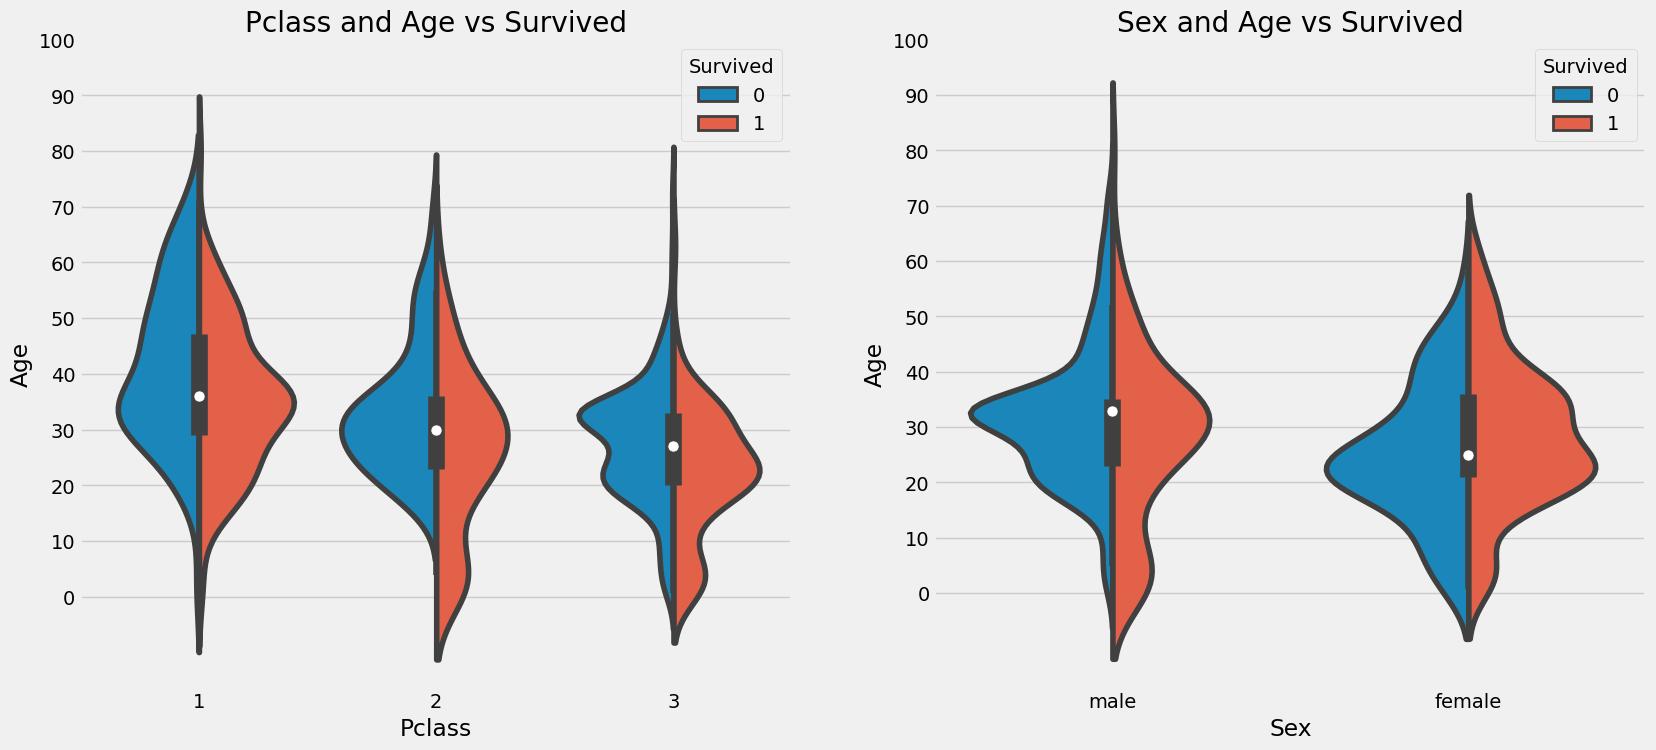

In [121]:
# 각 데이터간 그래프 비교
# 같은 라인에 그래프 표시
f,ax=plt.subplots(1,2,figsize=(18,8))

# 클래스와 나이간 생존 비교
sns.violinplot(x="Pclass",y="Age", hue="Survived", data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))

# 성별과 나이간 생존 비교
sns.violinplot(x="Sex",y="Age", hue="Survived", data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()


[클래스-나이 비교]
- 면적을 비교해보면 전체적으로 30대 탑승객이 많았는데, 그만큼 생존, 사망 비중도 많아서 가운데가 볼록한 그래프를 확인할수 있다
- 1등급 클래스는 전 연령대가 탑승했는데 생존 비율도 전체적으로 다른 클래스에 비해 높다

[성별-나이 비교]
- 여성은 70대 후반의 승객은 거의 찾을수 없고, 남성은 전 연령대가 탑승했다
- 남성은 주로 2-30대에서 많은 사망자 비율이 나왔고, 여성은 생존, 사망 비중이 거의 비슷하다. 


---

## 회고
[KEEP]
- seaborn의 여러 그래프 기능을 파악해볼수 있었다

[PROBLEM]   
- 결측값을 삭제하는 부분이 잘 해결이 되지 않았다. 시간이 부족해서 이유를 확인하지 못하고 넘어갈수 밖에없어서 너무 아쉽다.

[TRY]   
- 데이터프레임 결측값 삭제하는 방법에 대해 다시 공부하고, 어떤 부분에서 적용되지 않는건지 다시 확인한다  
- 다양한 데이터로 EDA, 시각화 하는 연습을 더 해본다!
